In [1]:
import os
print(os.getcwd())
os.chdir('..')
print(os.getcwd())

C:\Users\kimni\magiccam\Source\stargan\notebooks
C:\Users\kimni\magiccam\Source\stargan


In [2]:
%matplotlib inline

In [3]:
import plotutils

import numpy as np

import json
import imageio
import requests
import utils

In [4]:
IMAGE_PATH = '.\\dataset\\celebA\\test\\GrantGustin-2018.jpg'

HOST = 'stargan-serving.eastus.azurecontainer.io'
PORT = 8501
MODEL_NAME = 'stargan'
MODEL_VERSION = '001'

attributes = ['Black_Hair', 'Blond_Hair', 'Brown_Hair', 'Male', 'Young']
attributes_inv = ['Black_Hair', 'Blond_Hair', 'Brown_Hair', 'Female', 'Old']
labels = [1, 0, 0, 1, 1]

In [5]:
# [0, 255] -> [-1, 1]
def normalize(x):
    return x / 127.5 - 1


# [-1, 1] -> [0, 255]
def convert_to_imageio_accepted_range(x: np.ndarray) -> np.ndarray:
    return (x + 1.) * 127.5


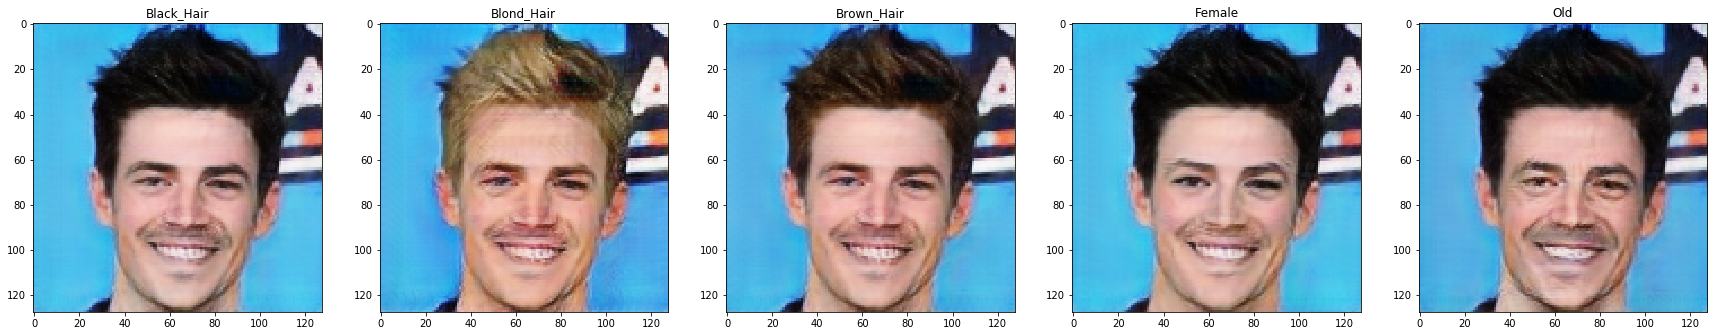

In [6]:
input_img = imageio.imread(IMAGE_PATH, pilmode='RGB')
input_img = normalize(input_img)
input_img = input_img.astype(float)
input_img = np.expand_dims(input_img, 0)

labels = np.expand_dims(labels, axis=0)
labels = utils.create_labels(labels, attributes)
labels = np.transpose(labels, axes=[1, 0, 2])

payload = {
    "inputs": {
        "custom_image": input_img.tolist(),
        "custom_label_fix_list": labels.tolist()
    }
}

# sending post request to TensorFlow Serving server
r = requests.post('http://{}:{}/v1/models/{}/versions/{}:predict'
                  .format(HOST, PORT, MODEL_NAME, MODEL_VERSION),
                  json=payload)
pred = json.loads(r.content.decode('utf-8'))
output_img = pred['outputs']  # output.shape = (5, 1, 128, 128, 3)
output_img = np.transpose(output_img, axes=[1, 0, 2, 3, 4])[0]  # (1, 5, 128, 128, 3)
output_img = convert_to_imageio_accepted_range(output_img)
output_img = output_img.astype('uint8')

plotutils.show_images(output_img, 1, attributes_inv)

In [7]:
print(pred)

{'outputs': [[[[[-0.275363, 0.333193, 0.635008], [-0.367499, 0.37042, 0.755368], [-0.434387, 0.402403, 0.789934], [-0.452724, 0.470603, 0.844369], [-0.482434, 0.466221, 0.845747], [-0.486232, 0.460015, 0.854919], [-0.479156, 0.457969, 0.855249], [-0.500499, 0.452908, 0.854281], [-0.478982, 0.454536, 0.850541], [-0.49632, 0.449494, 0.851233], [-0.478535, 0.452473, 0.850704], [-0.492692, 0.449537, 0.853451], [-0.480721, 0.439362, 0.848598], [-0.487878, 0.454987, 0.854315], [-0.468454, 0.459158, 0.854073], [-0.492217, 0.461451, 0.85509], [-0.486257, 0.449997, 0.847805], [-0.497664, 0.461943, 0.850602], [-0.490286, 0.458666, 0.845419], [-0.514667, 0.456565, 0.846341], [-0.508775, 0.443171, 0.842157], [-0.52043, 0.455053, 0.846254], [-0.504562, 0.456374, 0.84469], [-0.518638, 0.464644, 0.84874], [-0.510279, 0.457882, 0.846952], [-0.520139, 0.470986, 0.852683], [-0.507629, 0.469242, 0.852024], [-0.527231, 0.470744, 0.854224], [-0.526614, 0.458182, 0.8517], [-0.542112, 0.465623, 0.855975], [-